In [1]:
from gridworld import GridworldEnv
from Algorithms.single_q_learning import SingleQLearning
from Algorithms.double_q_learning import DoubleQLearning

import numpy as np
import matplotlib.pyplot as plt
import sys

from customgame import FirstGame

import time
assert sys.version_info[:3] >= (3, 6, 0), "Make sure you have Python 3.6 installed!"

In [2]:
env = GridworldEnv()

# env = FirstGame()

def running_mean(vals, n=1):
    cumvals = np.array(vals).cumsum()
    return (cumvals[n:] - cumvals[:-n]) / n

100%|██████████| 1000/1000 [00:00<00:00, 60242.22it/s]

Q_a: [[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]], Q_b: [[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]
1000
double: [[1.2        0.59361308]
 [0.         0.        ]
 [0.61381689 1.1351667 ]
 [0.         0.        ]]
double: [[0.6        0.45907127]
 [0.         0.        ]
 [0.44684226 0.43536581]
 [0.         0.        ]]


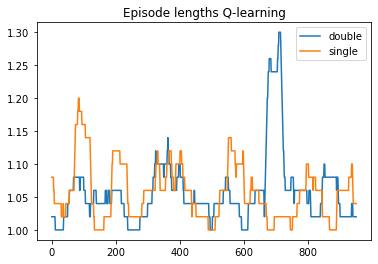

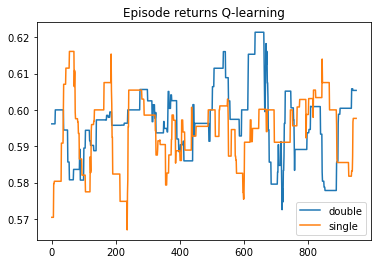

In [4]:
def compare_env(env):

    Q_a = np.zeros((env.nS, env.nA))
    Q_b = np.zeros((env.nS, env.nA))
    print(f"Q_a: {Q_a}, Q_b: {Q_b}")

    policy = DoubleQLearning.EpsilonGreedyPolicy(Q_a, Q_b, epsilon=0.1)
    Q_q_learning, (episode_lengths_double_q_learning, episode_returns_double_q_learning) = DoubleQLearning.double_q_learning(env, policy, Q_a, Q_b, 1000)

    print(f"double: {Q_q_learning}")

    Q = np.zeros((env.nS, env.nA))
    policy = SingleQLearning.EpsilonGreedyPolicy(Q, epsilon=0.1)
    Q_q_learning, (episode_lengths_single_q_learning, episode_returns_single_q_learning) = SingleQLearning.single_q_learning(env, policy, Q, 1000)

    print(f"double: {Q_q_learning}")

    n = 50

    plt.plot(running_mean(episode_lengths_double_q_learning, n), label="double")
    plt.plot(running_mean(episode_lengths_single_q_learning, n), label="single")
    plt.title('Episode lengths Q-learning')
    plt.legend()
    plt.show()
    plt.plot(running_mean(episode_returns_double_q_learning,n), label="double")
    plt.plot(running_mean(episode_returns_single_q_learning,n), label="single")
    plt.legend()
    plt.title('Episode returns Q-learning')
    plt.show()


compare_env(env)